### NOTEBOOK IMPORTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### FUNCTION TO DRAW LINE

In [2]:
def draw(x1, x2):
    ln = plt.plot(x1, x2, '-')

### ACTIVATION FUNCTION

In [3]:
def sigmoid(score):
    return 1 / (1 + np.exp(-score))

### CROSS ENTROPY ERROR CALCULATION

In [4]:
# Same as logistic regression loss funtion

def calculate_error(line_parameters, points, y):
    
    # number of data points
    m = points.shape[0]
    
    # calculating probabilites
    p = sigmoid(points * line_parameters)
    
    ce = -(1 / m) * (np.log(p).T * y + np.log(1 - p).T * (1 - y))
    
    return ce

### GRADIENT DESCENT

In [5]:
def gradient_descent(line_parameters, points, y, learning_rate):
    
    # number of data points
    m = points.shape[0]
        
    for i in range(2000):

        p = sigmoid(points * line_parameters)

        gradient = points.T * (p - y) * (learning_rate / m)
        
        # parameters updation
        line_parameters = line_parameters - gradient

        # getting new parameters (weights and bias)
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)

        # getting line coordinates to draw
        x1 = np.array([points[:, 0].min(), points[:, 0].max()])
        x2 = -b / w2 + x1 * (-w1 / w2)
        
    # drawing the line    
    draw(x1, x2)

### DATA MAKING

In [6]:
np.random.seed(42)

n_pts = 100

bias = np.ones(n_pts)

# Top Region of Data
top_region = np.array([
    np.random.normal(10, 2, n_pts),
    np.random.normal(12, 2, n_pts),
    bias
]).T

# Bottom Region of Data
bottom_region = np.array([
    np.random.normal(5, 2, n_pts),
    np.random.normal(6, 2, n_pts),
    bias
]).T

# Combining all points
all_points = np.vstack((top_region, bottom_region))

# Initial weights and biases of the perceptron
line_parameters = np.matrix([np.zeros(3)]).T

# Labels
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(2 * n_pts, 1)

### PLOTTING RESULTS

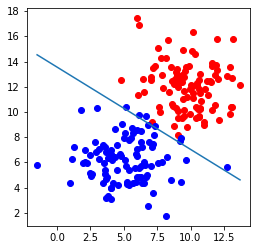

In [7]:
_, ax = plt.subplots(figsize=(4, 4))

ax.scatter(top_region[:,0], top_region[:, 1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:, 1], color='b')

gradient_descent(line_parameters, all_points, y, 0.06)

plt.show()

### LIVE UPDATION

<img src="perceptron.gif">

### FINAL ERROR (1000 Iterations)

<img src="final-error.png">